In [5]:
import pandas as pd

df = pd.read_csv('/Users/dashkaermak/Desktop/Datasets/countries_data.csv')

In [6]:
print(df.head())

            name            capital  population     area     region
0  South Georgia  King Edward Point          30   3903.0  Antarctic
1        Grenada       St. George's      112519    344.0   Americas
2    Switzerland               Bern     8654622  41284.0     Europe
3   Sierra Leone           Freetown     7976985  71740.0     Africa
4        Hungary           Budapest     9749763  93028.0     Europe


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        250 non-null    object 
 1   capital     246 non-null    object 
 2   population  250 non-null    int64  
 3   area        250 non-null    float64
 4   region      250 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB
None
         population          area
count  2.500000e+02  2.500000e+02
mean   3.111089e+07  6.005848e+05
std    1.296673e+08  1.909805e+06
min    0.000000e+00  4.400000e-01
25%    2.210995e+05  1.194250e+03
50%    4.912244e+06  6.492950e+04
75%    1.902577e+07  3.727260e+05
max    1.402112e+09  1.709824e+07


In [11]:
df.fillna({"capital":"Unknown"}, inplace=True)

In [12]:
print(df.isnull().sum())

name          0
capital       0
population    0
area          0
region        0
dtype: int64


In [13]:
df[df['population'] == 0]

,name,capital,population,area,region
82,Bouvet Island,Unknown,0,49.0,Antarctic
160,Heard Island and McDonald Islands,Unknown,0,412.0,Antarctic


In [14]:
df[df['area'] == 0.44]

,name,capital,population,area,region
169,Vatican City,Vatican City,451,0.44,Europe


In [15]:
import numpy as np
df.loc[df['population']==0, 'population']=np.nan

In [16]:
europe = df.loc[df['region'] == 'Europe', ['name', 'population', 'region']]
print(europe.head())

           name  population  region
2   Switzerland   8654622.0  Europe
4       Hungary   9749763.0  Europe
11        Italy  59554023.0  Europe
19      Andorra     77265.0  Europe
22       France  67391582.0  Europe


In [17]:
subset = df.iloc[0:5, 0:3]
print(subset)

            name            capital  population
0  South Georgia  King Edward Point        30.0
1        Grenada       St. George's    112519.0
2    Switzerland               Bern   8654622.0
3   Sierra Leone           Freetown   7976985.0
4        Hungary           Budapest   9749763.0


In [18]:
high_population = df.loc[df['population'] > 50000000]
print(high_population[['name', 'population']])

               name    population
11            Italy  5.955402e+07
13        Indonesia  2.735236e+08
21     South Africa  5.930869e+07
22           France  6.739158e+07
24           Mexico  1.289328e+08
28            China  1.402112e+09
36            Egypt  1.023344e+08
40       Bangladesh  1.646894e+08
43           Turkey  8.433907e+07
47   United Kingdom  6.721529e+07
61         Colombia  5.088288e+07
74         Pakistan  2.208923e+08
85            India  1.380004e+09
97          Germany  8.324052e+07
104          Russia  1.441041e+08
112        Ethiopia  1.149636e+08
132        Thailand  6.979998e+07
143     Philippines  1.095811e+08
150        DR Congo  1.084077e+08
158           Kenya  5.377130e+07
167         Vietnam  9.733858e+07
185        Tanzania  5.973421e+07
186     South Korea  5.178058e+07
200           Japan  1.258360e+08
203   United States  3.294841e+08
214         Nigeria  2.061396e+08
220            Iran  8.399295e+07
222          Brazil  2.125594e+08
225         My

In [19]:
import pandas as pd
high_population = df.loc[df['population']>50000000]

pd.set_option('display.float_format','{:.0f}'.format)
print(high_population[['name','population']])

               name  population
11            Italy    59554023
13        Indonesia   273523621
21     South Africa    59308690
22           France    67391582
24           Mexico   128932753
28            China  1402112000
36            Egypt   102334403
40       Bangladesh   164689383
43           Turkey    84339067
47   United Kingdom    67215293
61         Colombia    50882884
74         Pakistan   220892331
85            India  1380004385
97          Germany    83240525
104          Russia   144104080
112        Ethiopia   114963583
132        Thailand    69799978
143     Philippines   109581085
150        DR Congo   108407721
158           Kenya    53771300
167         Vietnam    97338583
185        Tanzania    59734213
186     South Korea    51780579
200           Japan   125836021
203   United States   329484123
214         Nigeria   206139587
220            Iran    83992953
222          Brazil   212559409
225         Myanmar    54409794


In [20]:
small_europe = df.loc[(df['region'] == 'Europe') & (df['area'] < 100000)]
print(small_europe[['name', 'area']])

                       name  area
2               Switzerland 41284
4                   Hungary 93028
19                  Andorra   468
27          North Macedonia 25713
31                 Guernsey    78
33   Svalbard and Jan Mayen 61399
34            Faroe Islands  1393
63                  Croatia 56594
67              Netherlands 41850
70            Liechtenstein   160
75                   Monaco     2
87               Montenegro 13812
92              Isle of Man   572
107                  Cyprus  9251
111  Bosnia and Herzegovina 51209
114                Slovenia 20273
118              San Marino    61
123              Luxembourg  2586
140                  Latvia 64559
144               Gibraltar     6
145                 Denmark 43094
152                 Czechia 78865
162                 Estonia 45227
169            Vatican City     0
171                 Austria 83871
177                 Ireland 70273
181           Åland Islands  1580
189               Lithuania 65300
191           

In [21]:
missing_population = df.loc[df['population'].isnull()]
print(missing_population)

                                  name  capital  population  area     region
82                       Bouvet Island  Unknown         NaN    49  Antarctic
160  Heard Island and McDonald Islands  Unknown         NaN   412  Antarctic


In [24]:

# Check average population by region
avg_population_by_region = df.groupby('region')['population'].mean()
print(avg_population_by_region)

region
Africa      23086360
Americas    18231722
Antarctic        477
Asia        92091899
Europe      14093096
Oceania      1597016
Name: population, dtype: float64


In [26]:
# Check total sum area by region

total_area_by_region = df.groupby('region')['area'].sum()
print(total_area_by_region)

region
Africa      30318417
Americas    42077922
Antarctic   14012111
Asia        32138141
Europe      23084297
Oceania      8515313
Name: area, dtype: float64


In [28]:
# add several agg functions

stats_by_region = df.groupby('region').agg({'population': ['mean', 'max', 'sum'], 'area': ['mean', 'sum']})
print(stats_by_region)

          population                          area         
                mean        max        sum    mean      sum
region                                                     
Africa      23086360  206139587 1362095235  513871 30318417
Americas    18231722  329484123 1020976420  751391 42077922
Antarctic        477       1000       1430 2802422 14012111
Asia        92091899 1402112000 4604594974  642763 32138141
Europe      14093096  144104080  746934072  435553 23084297
Oceania      1597016   25687041   43119432  315382  8515313


In [29]:
avg_area_by_region_and_capital = df.groupby(['region','capital'])['area'].mean()
print(avg_area_by_region_and_capital)

region   capital     
Africa   Abuja           923768
         Accra           238533
         Addis Ababa    1104300
         Algiers        2381741
         Antananarivo    587041
                          ...  
Oceania  South Tarawa       811
         Suva             18272
         Wellington      270467
         West Island         14
         Yaren               21
Name: area, Length: 248, dtype: float64


In [32]:
top_regions = df.groupby('region')['population'].sum().sort_values(ascending=False).head(5)
print(top_regions)

region
Asia       4604594974
Africa     1362095235
Americas   1020976420
Europe      746934072
Oceania      43119432
Name: population, dtype: float64


In [33]:
top_regions_df = df.groupby('region', as_index=False)['population'].sum().sort_values(by='population', ascending=False)
print(top_regions_df.head(5))

     region  population
3      Asia  4604594974
0    Africa  1362095235
1  Americas  1020976420
4    Europe   746934072
5   Oceania    43119432


In [36]:
europe_large_pop = df.loc[(df['region'] == 'Europe') & (df['population'] > 10_000_000)]
print(europe_large_pop)

               name    capital  population     area  region
11            Italy       Rome    59554023   301336  Europe
22           France      Paris    67391582   551695  Europe
47   United Kingdom     London    67215293   242900  Europe
62           Greece     Athens    10715549   131990  Europe
67      Netherlands  Amsterdam    16655799    41850  Europe
91          Ukraine       Kyiv    44134693   603500  Europe
97          Germany     Berlin    83240525   357114  Europe
101          Sweden  Stockholm    10353442   450295  Europe
104          Russia     Moscow   144104080 17098242  Europe
113           Spain     Madrid    47351567   505992  Europe
152         Czechia     Prague    10698896    78865  Europe
163         Romania  Bucharest    19286123   238391  Europe
230          Poland     Warsaw    37950802   312679  Europe
242        Portugal     Lisbon    10305564    92090  Europe
245         Belgium   Brussels    11555997    30528  Europe


In [37]:
smallest_countries = df.sort_values(by='area').head(5)
print(smallest_countries)

                        name       capital  population  area   region
169             Vatican City  Vatican City         451     0   Europe
75                    Monaco        Monaco       39244     2   Europe
144                Gibraltar     Gibraltar       33691     6   Europe
52                   Tokelau       Fakaofo        1411    12  Oceania
127  Cocos (Keeling) Islands   West Island         544    14  Oceania


In [38]:
avg_population = df.groupby('region')['population'].mean().sort_values(ascending=False)
print(avg_population)

region
Asia        92091899
Africa      23086360
Americas    18231722
Europe      14093096
Oceania      1597016
Antarctic        477
Name: population, dtype: float64


In [40]:
total_area = df.groupby('region')['area'].sum()
print(total_area)

region
Africa      30318417
Americas    42077922
Antarctic   14012111
Asia        32138141
Europe      23084297
Oceania      8515313
Name: area, dtype: float64


In [41]:
largest_region = df.groupby('region')['area'].sum().sort_values(ascending=False).head(1)
print(largest_region)

region
Americas   42077922
Name: area, dtype: float64


In [42]:
df['density'] = df['population']/df['area']
most_dense_countries = df.sort_values(by='density', ascending=False).head(3)
print(most_dense_countries[['name', 'population', 'area', 'density']])

          name  population  area  density
117      Macau      649342    30    21645
75      Monaco       39244     2    19428
42   Singapore     5685807   710     8008


In [43]:
df['area_category'] = pd.cut(df['area'], bins=[0, 1000, 5000, 50000, float('inf')], labels=['Small', 'Medium', 'Large', 'Huge'])
print(df[['name', 'area', 'area_category']].head())

            name  area area_category
0  South Georgia  3903        Medium
1        Grenada   344         Small
2    Switzerland 41284         Large
3   Sierra Leone 71740          Huge
4        Hungary 93028          Huge


In [45]:
df['population_mln'] = df['population']/1_000_000
print(df[['name', 'population','population_mln']].head())

            name  population  population_mln
0  South Georgia          30               0
1        Grenada      112519               0
2    Switzerland     8654622               9
3   Sierra Leone     7976985               8
4        Hungary     9749763              10


In [46]:
df.drop(columns=['population_mln'], inplace=True)

In [47]:
import requests

response = requests.get("https://restcountries.com/v3.1/all")
data = response.json()

# Transform data to DataFrame
df_extra = pd.DataFrame([{'name': country['name']['common'], 'currency': list(country['currencies'].keys())[0] if 'currencies' in country else 'Unknown'} for country in data])

df_merged = df.merge(df_extra, on='name', how='left')
print(df_merged.head())

            name            capital  population  area     region  density  \
0  South Georgia  King Edward Point          30  3903  Antarctic        0   
1        Grenada       St. George's      112519   344   Americas      327   
2    Switzerland               Bern     8654622 41284     Europe      210   
3   Sierra Leone           Freetown     7976985 71740     Africa      111   
4        Hungary           Budapest     9749763 93028     Europe      105   

  area_category currency  
0        Medium      SHP  
1         Small      XCD  
2         Large      CHF  
3          Huge      SLL  
4          Huge      HUF  


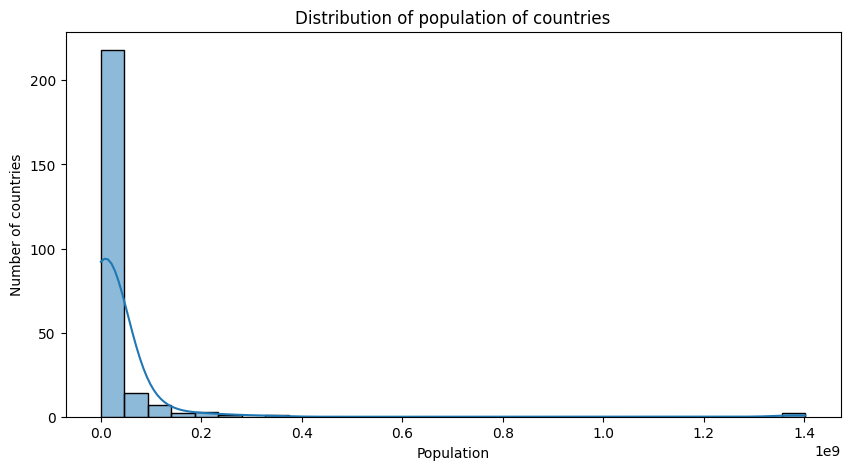

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['population'], bins=30, kde=True)
plt.title("Distribution of population of countries")
plt.xlabel("Population")
plt.ylabel("Number of countries")
plt.show()

In [49]:
plt.savefig("my_plot.png")

<Figure size 640x480 with 0 Axes>

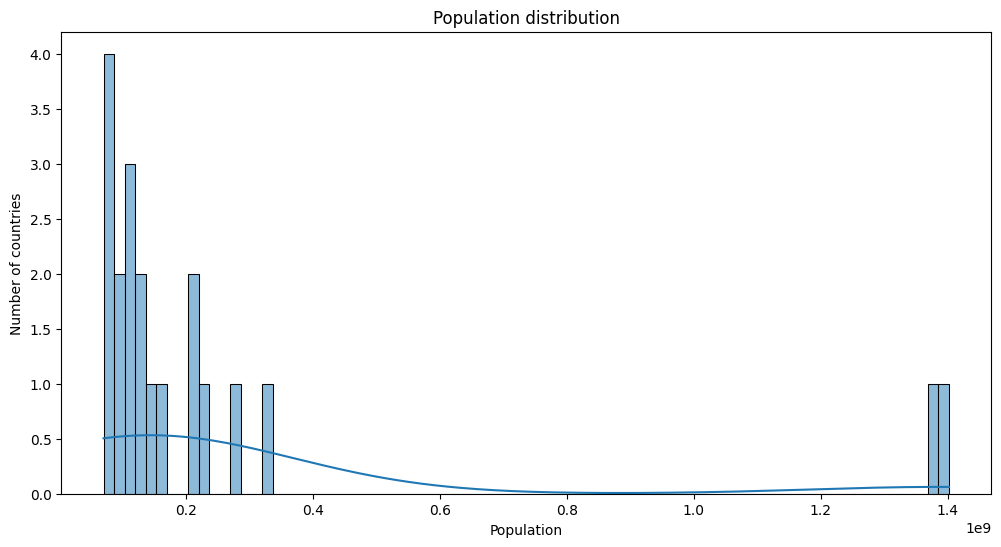

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

top_20 = df.sort_values(by="population", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.histplot(top_20['population'], bins=80, kde=True)
plt.title("Population distribution")
plt.xlabel("Population")
plt.ylabel("Number of countries")
plt.show()

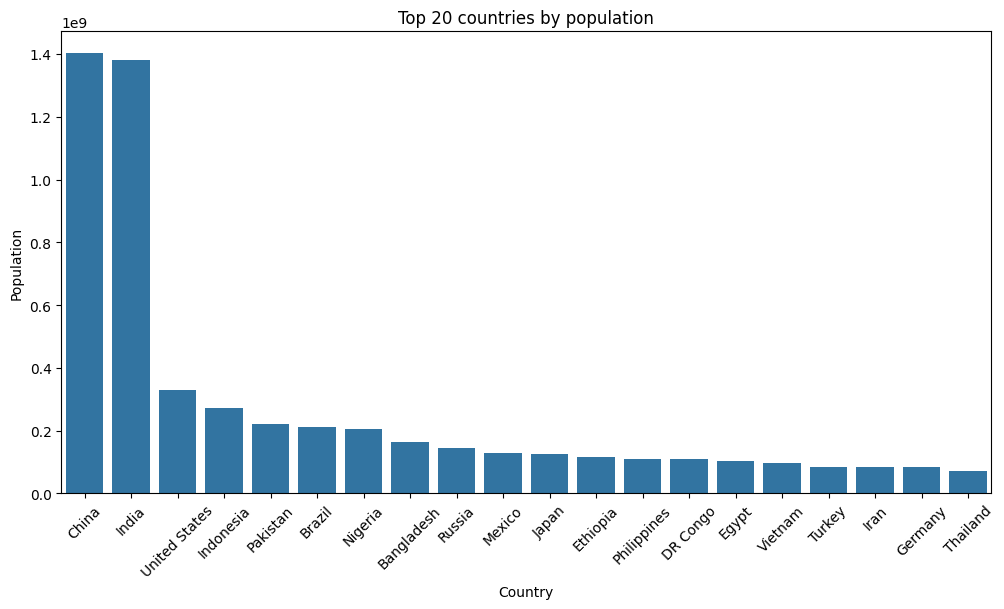

In [57]:
top_20 = df.sort_values(by="population", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_20['name'], y=top_20['population'])

plt.xticks(rotation=45)  # Rotate the labels for convenience
plt.title("Top 20 countries by population")
plt.xlabel("Country")
plt.ylabel("Population")
plt.show()

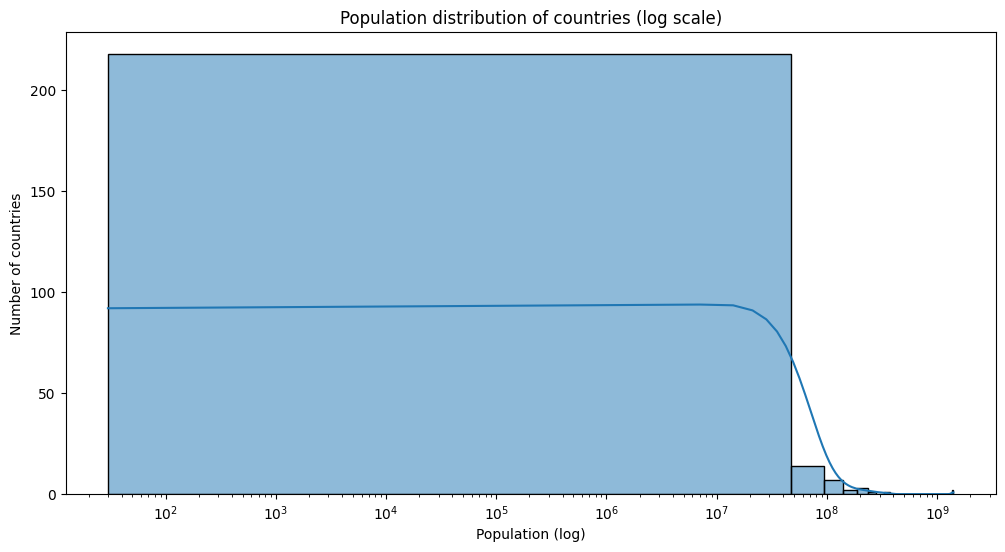

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(df['population'], bins=30, kde=True)

# Log scale
plt.xscale("log") 
plt.title("Population distribution of countries (log scale)")
plt.xlabel("Population (log)")
plt.ylabel("Number of countries")
plt.show()

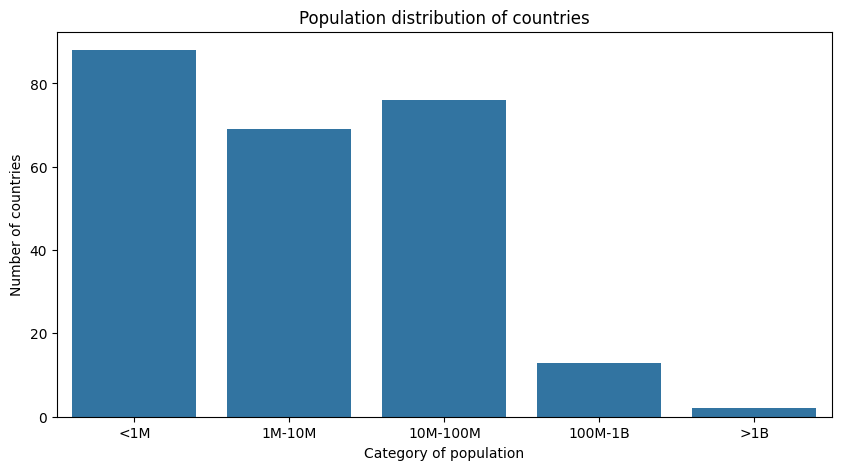

In [60]:
df['population_category'] = pd.cut(df['population'], 
                                   bins=[0, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000, float('inf')],
                                   labels=['<1M', '1M-10M', '10M-100M', '100M-1B', '>1B'])

plt.figure(figsize=(10,5))
sns.countplot(x=df['population_category'])
plt.title("Population distribution of countries")
plt.xlabel("Category of population")
plt.ylabel("Number of countries")
plt.show()

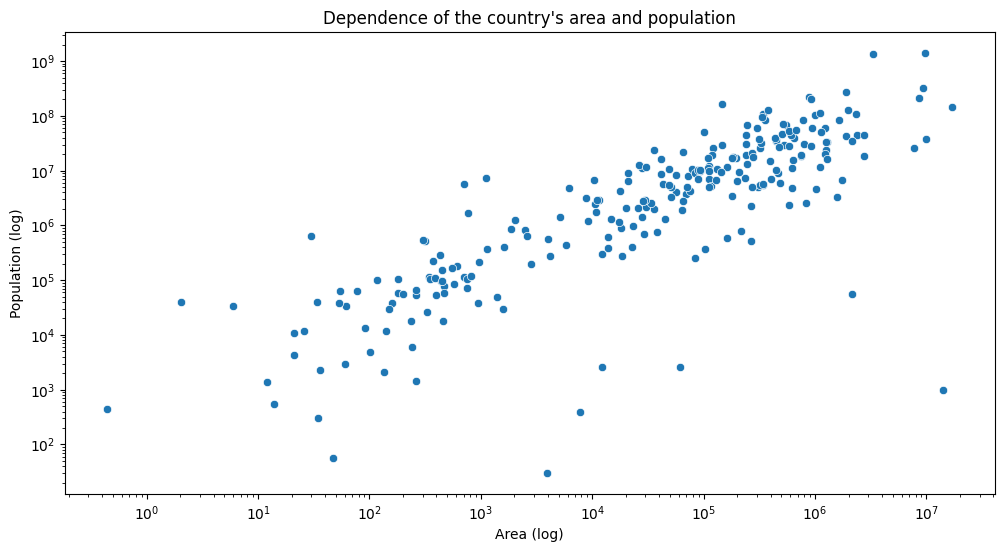

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['area'], y=df['population'])

# We use a logarithmic scale to visually unclutter the graph
plt.xscale("log")  
plt.yscale("log")

plt.title("Dependence of the country's area and population")
plt.xlabel("Area (log)")
plt.ylabel("Population (log)")
plt.show()

# 📊 Final Report on the Analysis of World Countries

## 1️⃣ Most Populated Countries
- The leading countries in terms of population are **China, India, and the United States**.
- The population gap between China and most other countries is **enormous**.

## 2️⃣ Population Density
- Small countries like **Vatican City and Monaco** have an **extremely high population density**.
- Large countries such as **Canada, Russia, and Australia** have a **low population density**, as vast areas remain sparsely populated.

## 3️⃣ Relationship Between Land Area and Population
- **There is no clear correlation between a country's size and its population**.  
  - Example: **India is significantly smaller than Russia but has a much larger population**.
- However, **very small countries tend to have high population density**.

## 4️⃣ Unexpected Findings
- Some regions **have a population of zero** (e.g., uninhabited islands).
- The visualization using a logarithmic scale revealed that **the population distribution among countries is extremely uneven**.

---
